# **Mastering Pandas Library & EDA** _Day-04_
##### Name: Muhammad Hassaan
##### Date: Jan 04, 2024
##### Email: muhammadhassaan7896@gmail.com

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Loading the dataset
df = sns.load_dataset("titanic")

<Axes: >

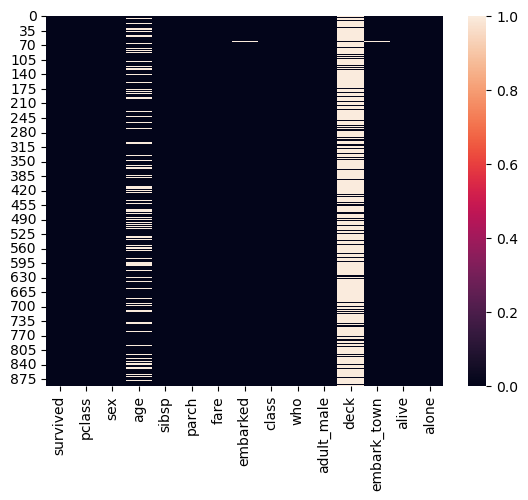

In [3]:
sns.heatmap(df.isnull())

In [4]:
# Showing top rows of the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Missing values and imputing them 


In [5]:
# find out the percentage of missing values
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
#1-  Drop the deck column from dataset
df.drop('deck', axis=1, inplace=True)

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [9]:
# 2- filling missing valuse of age column by the mean of age
df['age'].fillna(df['age'].mean(), inplace=True)

In [10]:
# 2- filling missing valuse of age column by the mean of age
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [11]:
# 2- filling missing valuse of age column by the mean of age
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

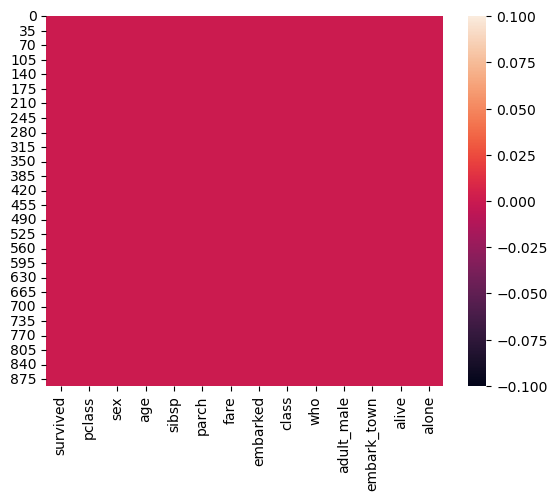

In [13]:
sns.heatmap(df.isnull())

## **Binning**

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
df.age.min()

0.42

In [16]:
df.age.max()

80.0

c:\Users\Muhammad Hassaan\.conda\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

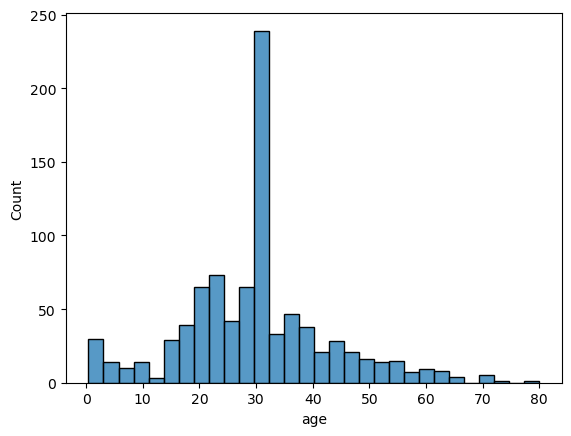

In [17]:
sns.histplot(df['age'])

In [18]:
# binning of age column into 7 categories
bins = [0,1,5,12,18,30,50,80]
labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Ageed', 'Old']

pd.cut(df['age'], bins=bins, labels=labels)

0            Youngs
1      Middle Ageed
2            Youngs
3      Middle Ageed
4      Middle Ageed
           ...     
886          Youngs
887          Youngs
888          Youngs
889          Youngs
890    Middle Ageed
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Kids' < 'Teens' < 'Youngs' < 'Middle Ageed' < 'Old']

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## **Feature Engineering**

In [20]:
# binning of age column into 7 categories
bins = [0,1,5,12,18,30,50,80]
labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Ageed', 'Old']

df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Ageed
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Ageed
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Ageed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,Youngs
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,Youngs
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Youngs
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,Youngs


In [22]:
df['binned_age'].value_counts()

binned_age
Youngs          447
Middle Ageed    241
Teens            70
Old              64
Toddlers         30
Kids             25
Infants          14
Name: count, dtype: int64

In [23]:
# renaming a column

df.rename(columns={'binned_age': 'age_groups'}, inplace=True)

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Ageed
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Ageed
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Ageed


## **Data Filteration**

In [25]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_groups'],
      dtype='object')

In [26]:
df_01 = df[['survived', 'age_groups', 'fare', 'class']]

In [27]:
df_01.head()

,survived,age_groups,fare,class
0,0,Youngs,7.2500,Third
1,1,Middle Ageed,71.2833,First
2,1,Youngs,7.9250,Third
3,1,Middle Ageed,53.1000,First
4,0,Middle Ageed,8.0500,Third


In [28]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   age_groups  891 non-null    category
 2   fare        891 non-null    float64 
 3   class       891 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 16.3 KB


In [29]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [30]:
# filter the data based on rows criteria

df_01[df_01['class'] == 'First']

,survived,age_groups,fare,class
1,1,Middle Ageed,71.2833,First
3,1,Middle Ageed,53.1000,First
6,0,Old,51.8625,First
11,1,Old,26.5500,First
23,1,Youngs,35.5000,First
...,...,...,...,...
871,1,Middle Ageed,52.5542,First
872,0,Middle Ageed,5.0000,First
879,1,Old,83.1583,First
887,1,Youngs,30.0000,First


In [31]:
df_200 = df_01[df_01['fare'] > 200]

In [32]:
df_200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 27 to 779
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    20 non-null     int64   
 1   age_groups  20 non-null     category
 2   fare        20 non-null     float64 
 3   class       20 non-null     category
dtypes: category(2), float64(1), int64(1)
memory usage: 1008.0 bytes


In [33]:
df_200['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64

In [35]:
# how to add two filter 
df_01[(df_01['fare'] > 70) & (df_01['class'] == 'First')]


,survived,age_groups,fare,class
1,1,Middle Ageed,71.2833,First
27,0,Youngs,263.0000,First
31,1,Youngs,146.5208,First
34,0,Youngs,82.1708,First
52,1,Middle Ageed,76.7292,First
...,...,...,...,...
829,1,Old,80.0000,First
835,1,Middle Ageed,83.1583,First
849,1,Youngs,89.1042,First
856,1,Middle Ageed,164.8667,First


In [36]:
# how to add two filter 
df_01[(df_01['fare'] > 70) & (df_01['class'] == 'First')].sort_values(by='fare')


,survived,age_groups,fare,class
540,1,Middle Ageed,71.0000,First
745,0,Old,71.0000,First
1,1,Middle Ageed,71.2833,First
366,1,Old,75.2500,First
218,1,Middle Ageed,76.2917,First
...,...,...,...,...
438,0,Old,263.0000,First
27,0,Youngs,263.0000,First
679,1,Middle Ageed,512.3292,First
258,1,Middle Ageed,512.3292,First
